# 04.14 - Visualization with Seaborn

Despite its popularity and ease of use, Matplotlib a quite dated and shows some shortcomings. To answer some of the most common complaints ..

1. Default visualisations based on Matlab 1999 (!)
2. Relative low-level API
3. Difficulty in handling Pandas DataFrames

.. we will introduce here <code>Seaborn</code>.

### Seaborn Versus Matplotlib

Using a random-walk plot as an example:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

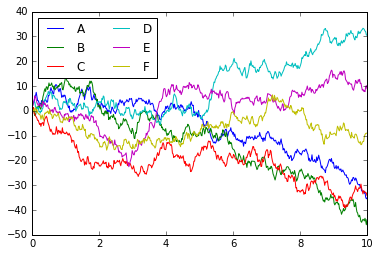

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
import seaborn as sns
sns.set()

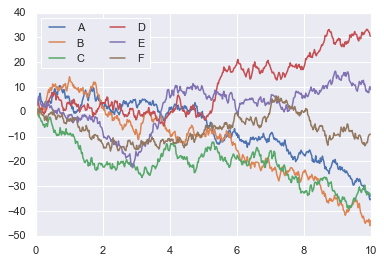

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Exploring Seaborn Plots: Histograms, KDE, and densities

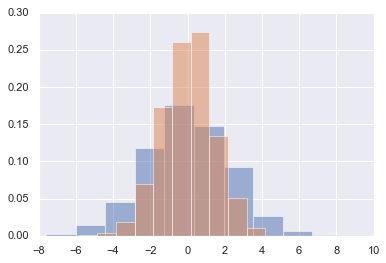

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

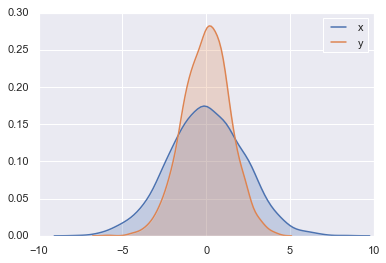

In [10]:
# kernel density estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

C:\Users\Giuseppe\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


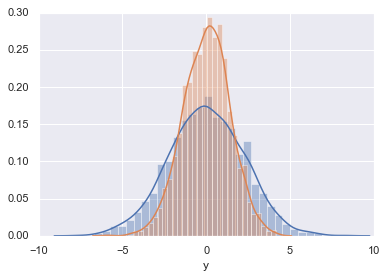

In [11]:
# combining histograms and KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to <code>kdeplot</code>, we will get a two-dimensional visualization of the data:

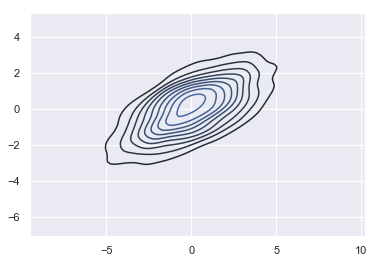

In [15]:
sns.kdeplot(data);

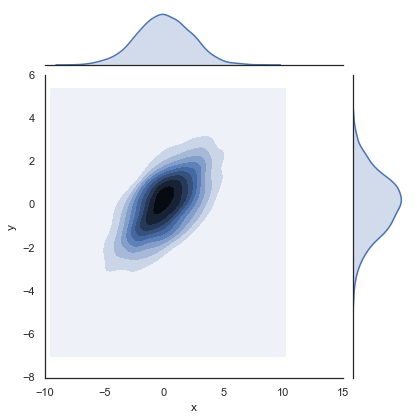

In [17]:
# joint and marginal distributions
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

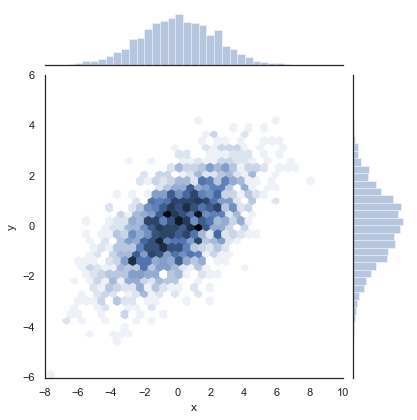

In [18]:
# hexagonally based plot
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

Pair plots are very useful for exploring correlations between multidimensional data and plot all pairs of values against each other.

Let's use the Iris dataset, which lists measurements of petals and sepals of three iris species as an example:

In [19]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can now visualize the multidimensional relationships among the samples calling <code>sns.pairplot</code>:

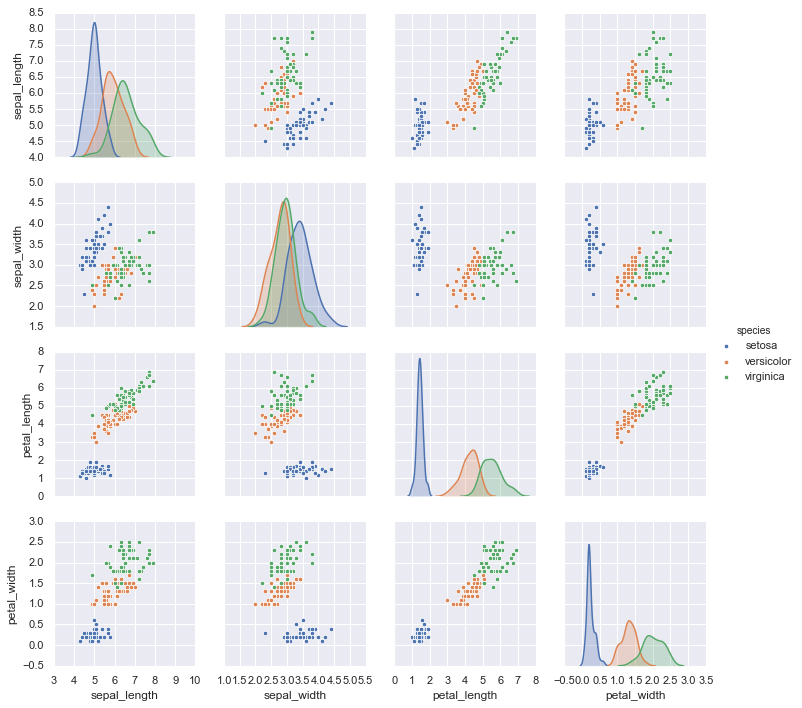

In [21]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

Sometimes a good way to explore the data is via histograms of subsets. An easy way to do this is to use <code>FacetGrid<code>:

In [22]:
# restautant tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


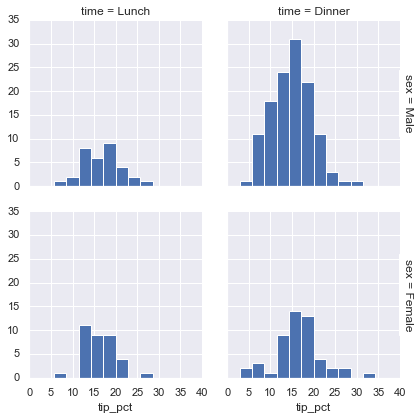

In [23]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots (called using <code>catplot</code>) allow you to view the distribution of a parameter within bins defined by any other parameter:

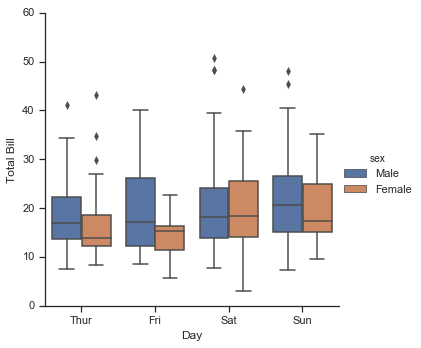

In [26]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

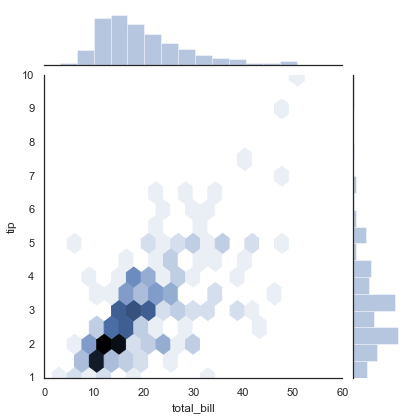

In [27]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

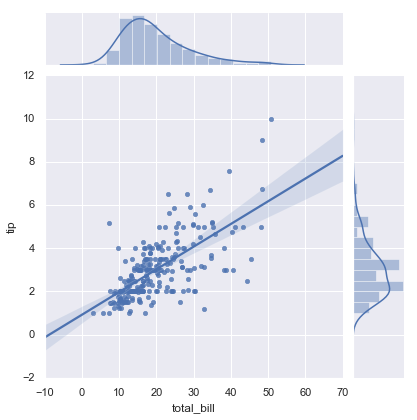

In [28]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

In [29]:
# exoplanets dataset
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


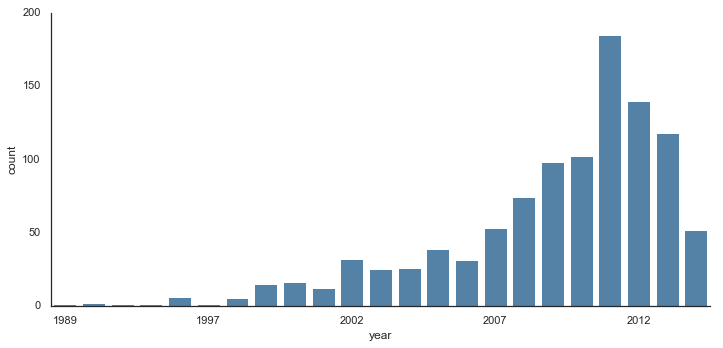

In [30]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

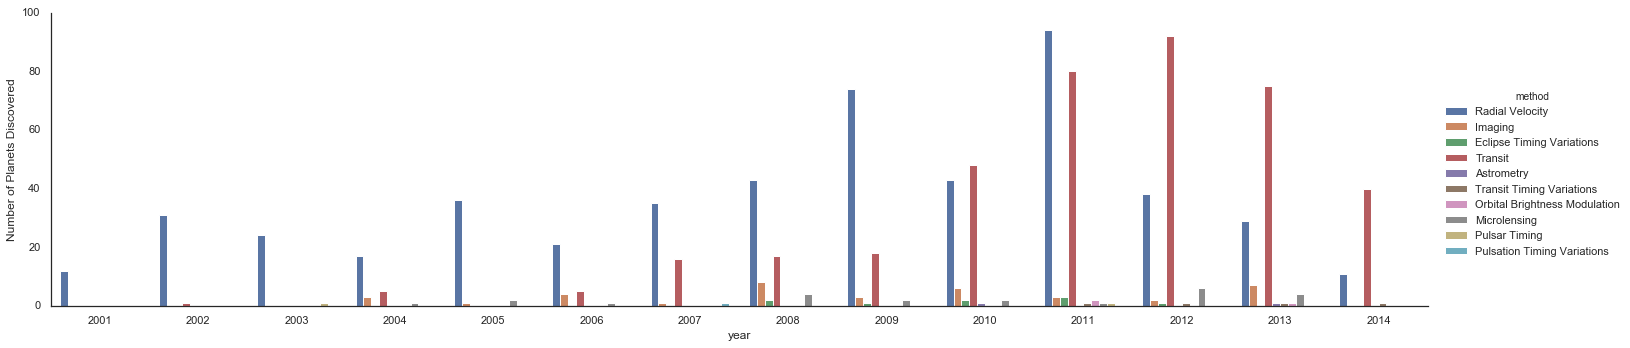

In [31]:
# method of discovery by year
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')